In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('/content/drive/MyDrive/Skripsi_Analisis_Sentimen/PelantikanPrabowoGibran.csv', sep=';')

In [ ]:
#-----CASE FOLDING-----#
import pandas as pd

df['Case Folding'] = df['sentimen'].str.lower()
print('Hasil Case Folding : \n')
print(df['Case Folding'])

Hasil Case Folding : 

0       ini nama-nama menteri presiden ke-8 ri prabowo...
1       hari pertama retreat kabinet prabowo ajarkan k...
2       selamat atas pelantikan presiden republik indo...
3       setelah resmi dilantik sebagai presiden ke-8 r...
4       menjalankan prabowonomics hari ini prabowo sub...
                              ...                        
4995    @info_beragam setuju banget cuy prabowo-gibran...
4996    setuju juga fren prabowo-gibran kerjafokus yak...
4997    @info_beragam sepakat temans dgn persatuan pra...
4998    bener banget bro prabowo-gibran kerjafokus yak...
4999    @info_beragam dengan masyarakat kokoh prabowo-...
Name: Case Folding, Length: 5000, dtype: object


In [ ]:
#------TOKENIZING------#
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

df['Tokenizing'] = df['Case Folding'].apply(word_tokenize)
print('Hasil Tokenizing : \n')
print(df['Tokenizing'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Hasil Tokenizing : 

0       [ini, nama-nama, menteri, presiden, ke-8, ri, ...
1       [hari, pertama, retreat, kabinet, prabowo, aja...
2       [selamat, atas, pelantikan, presiden, republik...
3       [setelah, resmi, dilantik, sebagai, presiden, ...
4       [menjalankan, prabowonomics, hari, ini, prabow...
                              ...                        
4995    [@, info_beragam, setuju, banget, cuy, prabowo...
4996    [setuju, juga, fren, prabowo-gibran, kerjafoku...
4997    [@, info_beragam, sepakat, temans, dgn, persat...
4998    [bener, banget, bro, prabowo-gibran, kerjafoku...
4999    [@, info_beragam, dengan, masyarakat, kokoh, p...
Name: Tokenizing, Length: 5000, dtype: object


In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def filter_tokens(tokens):
  """
  Fungsi untuk melakukan filtering pada tokens.

  Args:
    tokens: List of tokens.

  Returns:
    List of filtered tokens.
  """
  # 1. Menghapus Stop Words menggunakan Sastrawi
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  filtered_tokens = [w for w in tokens if not stopword.remove(w) == '']

  # 2. Menghapus Tanda Baca dan Karakter Khusus
  filtered_tokens = [w for w in filtered_tokens if w not in string.punctuation]
  filtered_tokens = [w for w in filtered_tokens if w.isalnum()]  # Hanya menyimpan token alfanumerik

  return filtered_tokens

# Contoh penggunaan pada DataFrame:
df['Filtered_Tokens'] = df['Tokenizing'].apply(filter_tokens)
print('Hasil Filtering: \n')
print(df['Filtered_Tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Hasil Filtering: 

0       [menteri, presiden, ri, prabowo, subianto, pra...
1       [hari, pertama, retreat, kabinet, prabowo, aja...
2       [selamat, atas, pelantikan, presiden, republik...
3       [resmi, dilantik, presiden, ri, minggu, prabow...
4       [menjalankan, prabowonomics, hari, prabowo, su...
                              ...                        
4995    [setuju, banget, cuy, kerjafokus, percaya, per...
4996    [setuju, fren, kerjafokus, yakin, kekmopakan, ...
4997    [sepakat, temans, dgn, persatuan, kerjafokus, ...
4998    [bener, banget, bro, kerjafokus, yakin, kebers...
4999    [masyarakat, kokoh, kerjafokus, yakin, nkri, m...
Name: Filtered_Tokens, Length: 5000, dtype: object


In [ ]:
#------FILTERING-----#
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string

def filter_tokens(tokens):
  """
  Fungsi untuk melakukan filtering pada tokens.

  Args:
    tokens: List of tokens.

  Returns:
    List of filtered tokens.
  """
  # 1. Menghapus Stop Words
  stop_words = set(stopwords.words('indonesian'))  # Ganti 'indonesian' dengan bahasa yang sesuai
  filtered_tokens = [w for w in tokens if not w.lower() in stop_words]

  # 2. Menghapus Tanda Baca dan Karakter Khusus
  filtered_tokens = [w for w in filtered_tokens if w not in string.punctuation]
  filtered_tokens = [w for w in filtered_tokens if w.isalnum()]  # Hanya menyimpan token alfanumerik

  return filtered_tokens

# Contoh penggunaan pada DataFrame:
df['Filtered_Tokens'] = df['Tokenizing'].apply(filter_tokens)
print(df['Filtered_Tokens'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [menteri, presiden, ri, prabowo, subianto, pra...
1       [retreat, kabinet, prabowo, ajarkan, kedisipli...
2       [selamat, pelantikan, presiden, republik, indo...
3       [resmi, dilantik, presiden, ri, minggu, prabow...
4       [menjalankan, prabowonomics, prabowo, subianto...
                              ...                        
4995    [setuju, banget, cuy, kerjafokus, percaya, per...
4996    [setuju, fren, kerjafokus, kekmopakan, memperk...
4997    [sepakat, temans, dgn, persatuan, kerjafokus, ...
4998    [bener, banget, bro, kerjafokus, kebersamaan, ...
4999    [masyarakat, kokoh, kerjafokus, nkri, memperku...
Name: Filtered_Tokens, Length: 5000, dtype: object


In [ ]:
#------NORMALISASI------#
def normalize_tokens(tokens):
  """
  Fungsi untuk melakukan normalisasi pada tokens.

  Args:
    tokens: List of tokens.

  Returns:
    List of normalized tokens.
  """
  kamus_normalisasi = {
      'nggak': 'tidak',
    'gpp': 'tidak apa-apa',
    'bgt': 'amat',
    'gak': 'tidak',
    'gw': 'saya',
    'mrk': 'mereka',
    'yg': 'yang',
    'udah': 'sudah',
    'utk': 'untuk',
    'aja': 'saja',
    'napa': 'kenapa',
    'pake': 'pakai',
    'anjrot':'anjing',
    'jgn' : 'jangan',
    'ttg' : 'tentang',
    'sngat' : 'sangat',
    'akhu' : 'aku',
    'lakuin' : 'lakukan',
    'kaga' : 'tidak',
    'gua' : 'saya',
    'bgst' : 'bangsat',
    'udh' : 'sudah',
    'sbg' : 'sebagai',
    'nie' : 'ini',
    'gada' : 'tidak ada',
    'janlup'  : 'jangan lupa',
    'smua' : 'semua',
    'kalo' :'kalau',
    'bnr' : 'benar',
    'kayak' : 'seperti',
    'tw'  : 'tahu',
    'gmn': 'bagaimana',
    'doang': 'saja',
    'cuman' :'cuma',
    'plis': 'tolong',
    'gausah': 'tidah perlu',
    'tp': 'tapi',
    'ga' : 'tidak',
      'prcy': 'percaya',
      'krn': 'karena',
      'lu' : 'kamu',
      'gausah': 'tidah perlu',
      'tp': 'tapi',
      'ga' : 'tidak',
      'sm': 'dengan',
      'kalo': 'kalau',
      'makasih' :'terimakasih',
      'sma': 'dengan',
      'dek': 'adik',
      'fufufafa' : 'fufufafa',
      'gapapa':'tidak apa apa',
      'gamau':'tidak mau',
      'jg':'juga',
      'dikit':'sedikit',
      'gaada': 'tidak ada',
      'lbih': 'lebih',
      'bener':'benar',
      'cakapan': 'cakap',
      'gmn': 'bagaimana',
      'rame': 'ramai',
      'anjir': 'anjing',
      'elek': 'jelek',
      'kabeh': 'semua',
      'banget': 'sekali',
      'dgn': 'dengan',
      'ri': 'republik indonesia',
      'kekmopakan': 'kompak',
      'fren': 'kawan',
      'beneran': 'benar',
      'slalu':'selalu',
      'fuck':'bangsat',
      'maen':'main',
      'jd':'jadi',
      'sdh':'sudah',
      'dlu':'dulu',
      'kpd':'kepada',
      'emang':'memang',
      'belom':'belum',
      'sob':'sobat',
      'gk': 'tidak',
      'nnti':'nanti',


  }

  # Normalisasi dengan kamus
  normalized_tokens = [kamus_normalisasi.get(token, token) for token in tokens]
  return normalized_tokens

# Contoh penggunaan pada DataFrame:
df['Normalized_Tokens'] = df['Filtered_Tokens'].apply(normalize_tokens)
print('Hasil Normalisasi: \n')
print(df['Normalized_Tokens'])

Hasil Normalisasi: 

0       [menteri, presiden, republik indonesia, prabow...
1       [retreat, kabinet, prabowo, ajarkan, kedisipli...
2       [selamat, pelantikan, presiden, republik, indo...
3       [resmi, dilantik, presiden, republik indonesia...
4       [menjalankan, prabowonomics, prabowo, subianto...
                              ...                        
4995    [setuju, sekali, cuy, kerjafokus, percaya, per...
4996    [setuju, kawan, kerjafokus, kompak, memperkoko...
4997    [sepakat, temans, dengan, persatuan, kerjafoku...
4998    [benar, sekali, bro, kerjafokus, kebersamaan, ...
4999    [masyarakat, kokoh, kerjafokus, nkri, memperku...
Name: Normalized_Tokens, Length: 5000, dtype: object


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stem_tokens(tokens):
  """
  Fungsi untuk melakukan stemming pada tokens.

  Args:
    tokens: List of tokens.

  Returns:
    List of stemmed tokens.
  """
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  return stemmed_tokens

# Contoh penggunaan pada DataFrame:
df['Stemmed_Tokens'] = df['Normalized_Tokens'].apply(stem_tokens)
print('Hasil Stemming: \n')
print(df['Stemmed_Tokens'])

Hasil Stemming: 

0       [menteri, presiden, republik indonesia, prabow...
1       [retreat, kabinet, prabowo, ajar, disiplin, ha...
2       [selamat, lantik, presiden, republik, indonesi...
3       [resmi, lantik, presiden, republik indonesia, ...
4       [jalan, prabowonomics, prabowo, subianto, lant...
                              ...                        
4995    [tuju, sekali, cuy, kerjafokus, percaya, satu,...
4996    [tuju, kawan, kerjafokus, kompak, kokoh, ekono...
4997    [sepakat, temans, dengan, satu, kerjafokus, hi...
4998    [benar, sekali, bro, kerjafokus, sama, tangguh...
4999    [masyarakat, kokoh, kerjafokus, nkri, kuat, ku...
Name: Stemmed_Tokens, Length: 5000, dtype: object


In [ ]:
# Kamus sentimen (lexicon)

def labeling_data(tokens):
    """
    Fungsi untuk melakukan pelabelan data berdasarkan lexicon.

    Args:
        tokens: List of tokens (misalnya, dari kolom 'Stemmed_Tokens').

    Returns:
        Label sentimen (1 untuk positif, 0 untuk negatif, 2 untuk netral).
    """
    positive_words = ['baik', 'bagus', 'senang','percaya','hebat','selamat','betul','yakin','benar','jujur','terima', 'setuju','amanah','dukung','salut','pantas','berhasil','layak','oke','efektif','sukses','keren','sepakat','suka', 'positif']
    negative_words = ['buruk', 'tidak', 'fufufafa','parah','jelek','rusak', 'kecewa','lemes','bohong','sedih', 'sebal','tolak','kesal','benci','bodoh','gila','hancur','batal','gagal','kosong', 'negatif']

    # Labeling
    if any(word in tokens for word in positive_words): # iterasi pada tokens
        return 1  # Positif
    elif any(word in tokens for word in negative_words): # iterasi pada tokens
        return 0  # Negatif
    else:
        return 2  # Netral



# Menerapkan pelabelan pada DataFrame
df['Label'] = df['Stemmed_Tokens'].apply(labeling_data)

# Menampilkan hasil
print('Hasil Labeling:')
print(df[['sentimen', 'Label']])
# Menampilkan jumlah data pada tiap kategori label
label_counts = df['Label'].value_counts()
print('\nJumlah Data pada Tiap Kategori Label:')
print(label_counts)

Hasil Labeling:
                                               sentimen  Label
0     Ini nama-nama menteri Presiden ke-8 RI Prabowo...      2
1     Hari Pertama Retreat Kabinet Prabowo Ajarkan K...      2
2     SELAMAT ATAS PELANTIKAN PRESIDEN REPUBLIK INDO...      1
3     Setelah resmi dilantik sebagai Presiden ke-8 R...      2
4     Menjalankan Prabowonomics Hari ini Prabowo Sub...      2
...                                                 ...    ...
4995  @info_beragam Setuju banget cuy PRABOWO-GIBRAN...      1
4996  Setuju juga fren PRABOWO-GIBRAN KerjaFOKUS yak...      2
4997  @info_beragam Sepakat temans dgn persatuan PRA...      1
4998  Bener banget bro PRABOWO-GIBRAN KerjaFOKUS yak...      1
4999  @info_beragam Dengan masyarakat kokoh PRABOWO-...      2

[5000 rows x 2 columns]

Jumlah Data pada Tiap Kategori Label:
Label
2    2934
1    1708
0     358
Name: count, dtype: int64


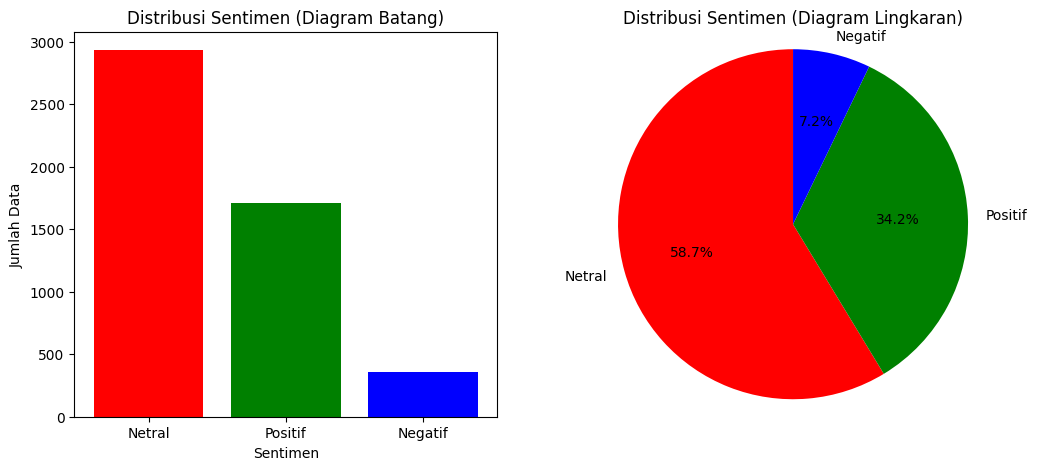

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data untuk setiap sentimen
sentiment_counts = df['Label'].value_counts()  # Perbaikan: 'Label' bukan 'label'

# Label untuk diagram
labels = sentiment_counts.index.tolist()
label_mapping = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
labels = [label_mapping[label] for label in labels]

# Membuat subplot untuk diagram batang dan lingkaran
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

# Diagram Batang
ax1.bar(labels, sentiment_counts, color=['red', 'green', 'blue'])
ax1.set_title('Distribusi Sentimen (Diagram Batang)')
ax1.set_xlabel('Sentimen')
ax1.set_ylabel('Jumlah Data')

# Diagram Lingkaran
ax2.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
ax2.set_title('Distribusi Sentimen (Diagram Lingkaran)')
ax2.axis('equal')  # Membuat lingkaran proporsional

# Menampilkan diagram
plt.show()

In [ ]:
#------ EKSTRAKSI FITUR (CountVectorizer) ------#
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = [' '.join(tokens) for tokens in df['Stemmed_Tokens']]
tfidf_df = vectorizer.fit_transform(corpus)

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = tfidf_df  # Fitur adalah DataFrame TF-IDF
y = df['Label']  # Label adalah kolom 'Label' di DataFrame asli

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)

Ukuran data latih: (3500, 6746) (3500,)
Ukuran data uji: (1500, 6746) (1500,)


In [ ]:
# Jumlah data untuk tiap kategori pada data latih
print("Jumlah Data pada Data Latih:")
print(y_train.value_counts())  # Gunakan y_train untuk label data latih
total_train = len(y_train)  # Menghitung total data latih
print(f"Total Data Latih: {total_train}\n")

# Jumlah data untuk tiap kategori pada data uji
print("Jumlah Data pada Data Uji:")
print(y_test.value_counts())  # Gunakan y_test untuk label data uji
total_test = len(y_test)  # Menghitung total data uji
print(f"Total Data Uji: {total_test}\n")

# Total keseluruhan data
total_data = total_train + total_test
print(f"Total Keseluruhan Data: {total_data}")

Jumlah Data pada Data Latih:
Label
2    2043
1    1202
0     255
Name: count, dtype: int64
Total Data Latih: 3500

Jumlah Data pada Data Uji:
Label
2    891
1    506
0    103
Name: count, dtype: int64
Total Data Uji: 1500

Total Keseluruhan Data: 5000


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Multinomial Naive Bayes
model = MultinomialNB()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model (misalnya, menggunakan accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.824


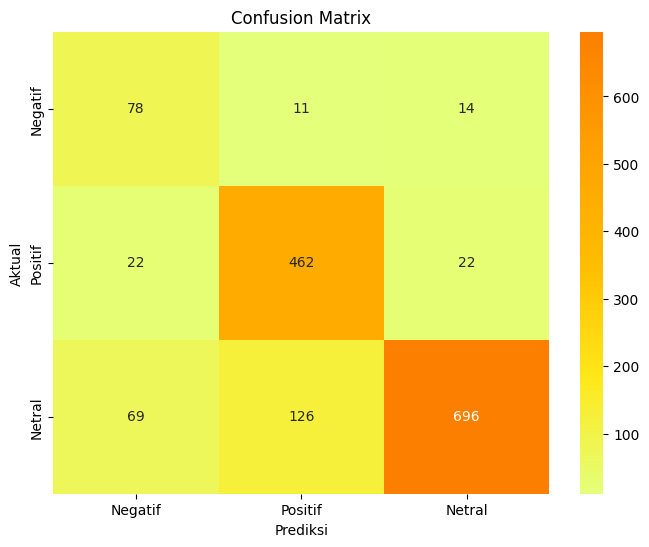

              precision    recall  f1-score   support

     Negatif       0.46      0.76      0.57       103
     Positif       0.77      0.91      0.84       506
      Netral       0.95      0.78      0.86       891

    accuracy                           0.82      1500
   macro avg       0.73      0.82      0.76      1500
weighted avg       0.86      0.82      0.83      1500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Wistia",
            xticklabels=['Negatif', 'Positif', 'Netral'],
            yticklabels=['Negatif', 'Positif', 'Netral'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Menampilkan classification report
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif', 'Netral']))

In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi
print("Hasil Prediksi:")
print(y_pred)

# Menampilkan label aktual untuk perbandingan (opsional)
print("\nLabel Aktual:")
print(y_test.values)

Hasil Prediksi:
[2 2 2 ... 2 2 0]

Label Aktual:
[2 1 2 ... 2 2 0]


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Tampilkan tabel prediksi kelas
cm_df = pd.DataFrame(cm, index=['Aktual Negatif', 'Aktual Positif', 'Aktual Netral'],
                     columns=['Prediksi Negatif', 'Prediksi Positif', 'Prediksi Netral'])
print(cm_df)

                Prediksi Negatif  Prediksi Positif  Prediksi Netral
Aktual Negatif                78                11               14
Aktual Positif                22               462               22
Aktual Netral                 69               126              696


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Negatif', 'Positif', 'Netral'])

print(report)

              precision    recall  f1-score   support

     Negatif       0.46      0.76      0.57       103
     Positif       0.77      0.91      0.84       506
      Netral       0.95      0.78      0.86       891

    accuracy                           0.82      1500
   macro avg       0.73      0.82      0.76      1500
weighted avg       0.86      0.82      0.83      1500



In [ ]:
import pandas as pd

# Asumsikan kamu telah menyimpan akurasi dari beberapa percobaan pada model Multinomial Naive Bayes
# Contoh data akurasi
akurasi_data = {
    'Percobaan': ['Percobaan 1', 'Percobaan 2', 'Percobaan 3'],
    'Akurasi': [0.85, 0.88, 0.82]  # Ganti dengan akurasi yang didapatkan
}

# Membuat DataFrame dari data akurasi
df_akurasi = pd.DataFrame(akurasi_data)

# Mengubah akurasi menjadi persentase
df_akurasi['Akurasi (%)'] = df_akurasi['Akurasi'] * 100

# Menampilkan tabel perbandingan akurasi dalam bentuk persentase
print(df_akurasi[['Percobaan', 'Akurasi (%)']])

     Percobaan  Akurasi (%)
0  Percobaan 1         85.0
1  Percobaan 2         88.0
2  Percobaan 3         82.0


In [ ]:
import pandas as pd

# Data akurasi (ganti dengan data Anda)
data_akurasi = {
    'Percobaan': ['Percobaan 1', 'Percobaan 2', 'Percobaan 3'],
    'Akurasi': [0.85, 0.88, 0.82],
    'Precision': [0.80, 0.85, 0.78],
    'Recall': [0.82, 0.87, 0.80],
    'F1-Score': [0.81, 0.86, 0.79]
}

# Membuat DataFrame
df_akurasi = pd.DataFrame(data_akurasi)

# Mengubah akurasi, precision, recall, dan F1-Score menjadi persentase
for kolom in ['Akurasi', 'Precision', 'Recall', 'F1-Score']:
    df_akurasi[kolom + ' (%)'] = df_akurasi[kolom] * 100

# Menampilkan tabel
print(df_akurasi[['Percobaan', 'Akurasi (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']])

     Percobaan  Akurasi (%)  Precision (%)  Recall (%)  F1-Score (%)
0  Percobaan 1         85.0           80.0        82.0          81.0
1  Percobaan 2         88.0           85.0        87.0          86.0
2  Percobaan 3         82.0           78.0        80.0          79.0


In [ ]:
import pickle

# Simpan model
with open('skripsianalisis.pkl', 'wb') as f:
    pickle.dump(model, f)
# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [ ]:
from google.colab import files

# Mengunduh file model_sentimen.pkl
files.download("skripsianalisis.pkl")

# Mengunduh file vectorizer.pkl jika diperlukan
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>